# библиотека Pandas

автор: Дьяконов Александр www.dyakonov.org/ag/

для поддержки курсов автора, в частности https://github.com/Dyakonov/IML


In [3]:
import pandas as pd
import numpy as np
%pylab inline
plt.style.use('seaborn-dark')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', size=14)

Populating the interactive namespace from numpy and matplotlib


**Pandas** - библиотека для анализа данных, в первую очередь для работы с табличными данными. Особенно хороша в разведовательном анализе в сочетании с тетрадками Jupyter.


# Основные объекты в Pandas

### 1. Серия

- набор значений одного типа, имеет специальный index, по которому возможна эффективная индексация и по которой происходит выравнивание при применении операций

In [3]:
# серия
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

# похоже на словарь
print (s['b'])
print (s.get('z', 'error'))

print (s)

-0.422271578379
error
a   -1.457794
b   -0.422272
c    1.524792
d   -1.898869
e    0.048427
dtype: float64


In [4]:
# автоматическое выравниванние по индексу
print (s + s[1:])

a         NaN
b   -0.844543
c    3.049584
d   -3.797739
e    0.096854
dtype: float64


In [8]:
s1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s2 = pd.Series([10, 20, 30], index=['c', 'b', 'd'])

s1 + s2

a     NaN
b    22.0
c    13.0
d     NaN
dtype: float64

In [4]:
# из словаря
s = pd.Series({'a': 1, 'b': 2})

print (s)
print (s.index)
print (s.values)

a    1
b    2
dtype: int64
Index(['a', 'b'], dtype='object')
[1 2]


In [16]:
s = pd.Series(range(100))
print (s.head()) # первые позиции
print (s.tail()) # посдедние позиции
print (s.take([3, 10, 27])) # заданные

0    0
1    1
2    2
3    3
4    4
dtype: int64
95    95
96    96
97    97
98    98
99    99
dtype: int64
3      3
10    10
27    27
dtype: int64


In [7]:
# ИНДЕКСАЦИЯ СЕРИЙ
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
print (s[2:4]) # срез - slicing
print (s.loc[['d', 'a', 'f']]) # по метке см. - будет NaN
print (s.iloc[[2, 3]]) # по позиции
print (s[['a', 'd']])
print (s[0:5:2]) # через один элемент

c    3
d    4
dtype: int64
d    4.0
a    1.0
f    NaN
dtype: float64
c    3
d    4
dtype: int64
a    1
d    4
dtype: int64
a    1
c    3
e    5
dtype: int64


In [27]:
s1 = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
s2 = pd.Series(2, index=s1.index)
s2

a    2
b    2
c    2
d    2
e    2
dtype: int64

In [31]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
print (s > 2) # логическая серия
print (s[(s > 2) & (s < 5)])

a    False
b    False
c     True
d     True
e     True
dtype: bool
c    3
d    4
dtype: int64


In [8]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
print (s.reindex(['a', 'c', 'cc', 'e', 'f'], fill_value=0)) # переиндексация
print (s.reindex(['a', 'c', 'cc', 'e', 'f'], method='ffill')) # прямое заполнение пропусков
print (s.reindex(['a', 'c', 'cc', 'e', 'f'], method='bfill')) # обратное заполнение пропусков

a     1
c     3
cc    0
e     5
f     0
dtype: int64
a     1
c     3
cc    3
e     5
f     5
dtype: int64
a     1.0
c     3.0
cc    4.0
e     5.0
f     NaN
dtype: float64


In [37]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
del s['c']
s['g'] = 6
s

a    1
b    2
d    4
e    5
g    6
dtype: int64

## 2. Датафрейм

- набор серий с одним индексом. Идеально подходит для хранение матрицы "объект-признак"

In [11]:
# ДатаФрейм
df = pd.DataFrame(np.random.randn(8, 3),
                  index=pd.date_range('1/1/2000', periods=8),
                  columns=['A', 'B', 'C'])
df

,A,B,C
2000-01-01,1.547873,0.177085,-0.822281
2000-01-02,-1.258131,0.295027,0.290454
2000-01-03,-0.734608,-0.938382,0.095872
2000-01-04,-1.005427,0.587271,-1.062135
2000-01-05,-1.001931,1.432889,1.612434
2000-01-06,-0.617309,0.616450,1.329326
2000-01-07,-0.068663,-0.746418,-1.609619
2000-01-08,-0.092080,1.984432,-0.044310


In [6]:
# конкретные индексы
df.take([0, 1, 2])

,A,B,C
2000-01-01,-0.629868,-0.735201,0.140498
2000-01-02,0.398887,-0.014752,-0.452073
2000-01-03,0.612849,-0.999930,-0.328033


In [9]:
# случайная подвыборка
df.sample(5)

,A,B,C
2000-01-05,-2.727855,0.524100,0.805572
2000-01-04,1.199080,-0.258422,-1.903036
2000-01-08,-2.728500,-0.048074,-0.566725
2000-01-07,-1.178639,-1.531432,-0.633474
2000-01-02,0.398887,-0.014752,-0.452073


In [13]:
for index, row in df.iterrows(): 
    print (index, row)


2000-01-01 00:00:00 A    1.547873
B    0.177085
C   -0.822281
Name: 2000-01-01 00:00:00, dtype: float64
2000-01-02 00:00:00 A   -1.258131
B    0.295027
C    0.290454
Name: 2000-01-02 00:00:00, dtype: float64
2000-01-03 00:00:00 A   -0.734608
B   -0.938382
C    0.095872
Name: 2000-01-03 00:00:00, dtype: float64
2000-01-04 00:00:00 A   -1.005427
B    0.587271
C   -1.062135
Name: 2000-01-04 00:00:00, dtype: float64
2000-01-05 00:00:00 A   -1.001931
B    1.432889
C    1.612434
Name: 2000-01-05 00:00:00, dtype: float64
2000-01-06 00:00:00 A   -0.617309
B    0.616450
C    1.329326
Name: 2000-01-06 00:00:00, dtype: float64
2000-01-07 00:00:00 A   -0.068663
B   -0.746418
C   -1.609619
Name: 2000-01-07 00:00:00, dtype: float64
2000-01-08 00:00:00 A   -0.092080
B    1.984432
C   -0.044310
Name: 2000-01-08 00:00:00, dtype: float64


#### Загрузка данных

In [6]:
# загрузка данных

# Excel
data2 = pd.read_excel('D:\\filename.xlsx', sheetname='1')
# csv-файл
data = pd.read_csv('D:\\filename.csv', sep=';', decimal=',', dtype = { 'Summa' : np.float64},
                  header=0, names=['client', 'time', 'summa', 'target'])
# parse_dates=['Date'] - указывает, где даты
# usecols=['Date', 'Close'] - указывает столбцы для загрузки
# index_col=['Date'] - что индекс

data.to_csv('foo.csv') # сохранение
# HDF5
pd.read_hdf('foo.h5', 'df')
df.to_hdf('foo.h5', 'df') # сохранение

#### ДатаФреймы

In [10]:
# создание дата-фрейма

data = pd.DataFrame({ 'A' : [1., 4., 2., 1.],
'B' : pd.Timestamp('20130102'),
'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
'D' : np.array([3] * 4,dtype='int32'),
'E' : pd.Categorical(["test","train","test","train"]),
'F' : 'foo' }, index=pd.period_range('Jan-2000', periods=4, freq='M'))
print (data)

# второй способ
tmp = dict([('A',[1., np.nan, 2., 1.]), ('B',[2.2, np.nan, np.nan, 0.0])]) # ещё один способ
data2 = pd.DataFrame(tmp)

print (data2)
print (len(data2), data2.shape) # число строк и размеры

           A          B   C  D      E    F
2000-01  1.0 2013-01-02 NaN  3   test  foo
2000-02  4.0 2013-01-02 NaN  3  train  foo
2000-03  2.0 2013-01-02 NaN  3   test  foo
2000-04  1.0 2013-01-02 NaN  3  train  foo
     A    B
0  1.0  2.2
1  NaN  NaN
2  2.0  NaN
3  1.0  0.0
4 (4, 2)


In [15]:
# простейшие операции
# столбцы
print (data.columns)

# строки - но тут временная индексация
print (data.index)

# сами данные
print (data)

# сортировка
print (data.sort_values(by='A')) ## NEW!!!!

# типы
print (data.dtypes)

# статистика + транспонирование
print (data.describe().T)

# статистика по категориальным признакам
#print data.describe(include=['object'])

# число уникальных элементов
for i in data.columns:
    print (str(i) + ':' + str(data[i].nunique()))
    
# так перевится в np-матрицу    
data.values     

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')
PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04'], dtype='period[M]', freq='M')
           A          B   C  D      E    F
2000-01  1.0 2013-01-02 NaN  3   test  foo
2000-02  4.0 2013-01-02 NaN  3  train  foo
2000-03  2.0 2013-01-02 NaN  3   test  foo
2000-04  1.0 2013-01-02 NaN  3  train  foo
           A          B   C  D      E    F
2000-01  1.0 2013-01-02 NaN  3   test  foo
2000-04  1.0 2013-01-02 NaN  3  train  foo
2000-03  2.0 2013-01-02 NaN  3   test  foo
2000-02  4.0 2013-01-02 NaN  3  train  foo
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object
   count  mean       std  min  25%  50%  75%  max
A    4.0   2.0  1.414214  1.0  1.0  1.5  2.5  4.0
C    0.0   NaN       NaN  NaN  NaN  NaN  NaN  NaN
D    4.0   3.0  0.000000  3.0  3.0  3.0  3.0  3.0
A:3
B:1
C:0
D:1
E:2
F:1


array([[1.0, Timestamp('2013-01-02 00:00:00'), nan, 3, 'test', 'foo'],
       [4.0, Timestamp('2013-01-02 00:00:00'), nan, 3, 'train', 'foo'],
       [2.0, Timestamp('2013-01-02 00:00:00'), nan, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), nan, 3, 'train', 'foo']],
      dtype=object)

In [16]:
# переименование колонок
data.rename(columns = {'F': 'F_new', 'E': 'E_new'}) # inplace=Ture

,A,B,C,D,E_new,F_new
2000-01,1.0,2013-01-02,NaN,3,test,foo
2000-02,4.0,2013-01-02,NaN,3,train,foo
2000-03,2.0,2013-01-02,NaN,3,test,foo
2000-04,1.0,2013-01-02,NaN,3,train,foo


In [17]:
data['G'] = 1.0 # добавление столбца, insert - в определённую позицию
del data['G'] # удаление столбца
data.drop(pd.Period('2000-03'), axis=0, inplace=False) # удаление строки
# drop - можно удалять строки и столбцы

,A,B,C,D,E,F
2000-01,1.0,2013-01-02,NaN,3,test,foo
2000-02,4.0,2013-01-02,NaN,3,train,foo
2000-04,1.0,2013-01-02,NaN,3,train,foo


In [18]:
y = data.pop('D') # удаление с присваиванием
print (y)
data

2000-01    3
2000-02    3
2000-03    3
2000-04    3
Freq: M, Name: D, dtype: int32


,A,B,C,E,F
2000-01,1.0,2013-01-02,NaN,test,foo
2000-02,4.0,2013-01-02,NaN,train,foo
2000-03,2.0,2013-01-02,NaN,test,foo
2000-04,1.0,2013-01-02,NaN,train,foo


In [54]:
# сравнения
df1 = pd.DataFrame({'x':[1,3,2], 'y':[2,4,1]})
df2 = pd.DataFrame({'x':[3,1,2], 'y':[0,2,2]})
print df1>=df2
print (df1>=df2).any(axis=1)
print (df1>=df2).all()

       x      y
0  False   True
1   True   True
2   True  False
0    True
1    True
2    True
dtype: bool
x    False
y    False
dtype: bool


# Индексация

Кстати, по индексу существенно быстрее искать!

In [10]:
data = pd.DataFrame({'A' : [1., 4., 2., 1.],
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' }, index=pd.period_range('Jan-2000', periods=4, freq='M'))

# особенности примитивной индексации
print (data.head(2)) # первые строки
print (data.head(2)) # последние строки
# нельзя data[1], data[1,2]

print (data[['B', 'C']]) # получение определённых столбцов
print (data[data.columns[3:]])

           A          B   C  D      E    F
2000-01  1.0 2013-01-02 NaN  3   test  foo
2000-02  4.0 2013-01-02 NaN  3  train  foo
           A          B   C  D      E    F
2000-01  1.0 2013-01-02 NaN  3   test  foo
2000-02  4.0 2013-01-02 NaN  3  train  foo
                 B   C
2000-01 2013-01-02 NaN
2000-02 2013-01-02 NaN
2000-03 2013-01-02 NaN
2000-04 2013-01-02 NaN
         D      E    F
2000-01  3   test  foo
2000-02  3  train  foo
2000-03  3   test  foo
2000-04  3  train  foo


In [47]:
data.iloc[[0, 2]] # 0я и 2я строки СМ, КВАДРАТНЫЕ СКОБКИ

,A,B,C,D,E,F
2000-01,1.0,2013-01-02,NaN,3,test,foo
2000-03,2.0,2013-01-02,NaN,3,test,foo


In [82]:
data.loc[[pd.Period('2000-03'), pd.Period('2000-04')]]

,A,B,C,D,E,F
2000-03,2.0,2013-01-02,NaN,3,test,foo
2000-04,1.0,2013-01-02,NaN,3,train,foo


In [85]:
data.index.get_loc(pd.Period('2000-03')) # где находится

2

In [86]:
data.iat[1,1]

Timestamp('2013-01-02 00:00:00')

In [88]:
# data.at[pd.Period('2000-01'), 'A'] # НЕ работает

In [66]:
data.at['2000-01','A'] = 10. # работает

In [89]:
data.loc[[pd.Period('2000-03'), pd.Period('2000-04')]][['A', 'B']]

,A,B
2000-03,2.0,2013-01-02
2000-04,1.0,2013-01-02


In [19]:
# индексация
data.at['2000-01','A'] = 10.
print data.loc['2000-01':'2000-02',['D','B','A']]
data.iat[0,1] = pd.Timestamp('19990101') # просто = '1999/01/01' не работает
print data.iloc[0:2,1:3]
print data.ix[0:2,1:3]
# выбор с проверкой на вхождение
print data[data['E'].isin(['test','valid'])]
# если не делать принт - выглядит круче
data.tail(3).T

         D          B   A
2000-01  3 2013-01-02  10
2000-02  3 2013-01-02   4
                 B   C
2000-01 1999-01-01 NaN
2000-02 2013-01-02 NaN
                 B   C
2000-01 1999-01-01 NaN
2000-02 2013-01-02 NaN
          A          B   C  D     E    F
2000-01  10 1999-01-01 NaN  3  test  foo
2000-03   2 2013-01-02 NaN  3  test  foo


,2000-02,2000-03,2000-04
A,4,2,1
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,NaN,NaN,NaN
D,3,3,3
E,train,test,train
F,foo,foo,foo


Меняем порядок записи

In [63]:
# меняем порядок записи в датафрейме
data.reindex(index=data.index[::-1]) # или data = data.iloc[::-1]

,A,B,C,D,E,F
2000-04,1,2013-01-02,NaN,3,train,foo
2000-03,2,2013-01-02,NaN,3,test,foo
2000-02,4,2013-01-02,NaN,3,train,foo
2000-01,1,2013-01-02,NaN,3,test,foo


In [6]:
s = pd.DataFrame({'x':[1,2,3,4], 'y':[10,20,30,40]}, index=['a','b','c','d'])
s.reindex(index=['d','b','x'], columns=['y','z'])

,y,z
d,40.0,NaN
b,20.0,NaN
x,NaN,NaN


In [7]:
s = pd.Series([10,20,60], index=[1,2,6])
s.reindex(index=[2,3,4,5,6,7], method='ffill')

2    20
3    20
4    20
5    20
6    60
7    60
dtype: int64

In [207]:
# выбор нескольких слуайных строк
print (data.take(np.random.permutation(len(df))[:2]))

           A          B   C  D      E    F
2000-03  2.0 2013-01-02 NaN  3   test  foo
2000-02  4.0 2013-01-02 NaN  3  train  foo


In [209]:
data.sample(n=2) # лучше так!!!

,A,B,C,D,E,F
2000-04,1.0,2013-01-02,NaN,3,train,foo
2000-02,4.0,2013-01-02,NaN,3,train,foo


In [210]:
data.sample(frac=1.0) # перестановка строк!

,A,B,C,D,E,F
2000-01,1.0,2013-01-02,NaN,3,test,foo
2000-04,1.0,2013-01-02,NaN,3,train,foo
2000-02,4.0,2013-01-02,NaN,3,train,foo
2000-03,2.0,2013-01-02,NaN,3,test,foo


In [9]:
# зачем нужны встроенные операции
df = pd.DataFrame({'x':[1,3,2], 'y':[2,4,1]})
df.sub(df['x'], axis=0) # add
print (df)

df.T.dot(df) # матричное умножение

   x  y
0  1  2
1  3  4
2  2  1


,x,y
x,14,16
y,16,21


In [100]:
data[data.columns[::-1]] # изменение порядка колонок
# нет способа переставить колонки не сделав копии!!!

,F,E,D,C,B,A
2000-01,foo,test,3,NaN,2013-01-02,1.0
2000-02,foo,train,3,NaN,2013-01-02,4.0
2000-03,foo,test,3,NaN,2013-01-02,2.0
2000-04,foo,train,3,NaN,2013-01-02,1.0


## Индекс

In [104]:
idx = pd.Index(['a', 'b', 'c'])

idx.where([True, False, True])

Index(['a', nan, 'c'], dtype='object')

In [106]:
# интревальный индекс
pd.IntervalIndex.from_breaks([0, 0.1, 0.75, 1])

IntervalIndex([(0.0, 0.1], (0.1, 0.75], (0.75, 1.0]]
              closed='right',
              dtype='interval[float64]')

In [108]:
# категориальный индекс
pd.CategoricalIndex(['a', 'b', 'a', 'b', 'b'])

CategoricalIndex(['a', 'b', 'a', 'b', 'b'], categories=['a', 'b'], ordered=False, dtype='category')

In [127]:
data = pd.DataFrame({'a': [1, 2, 1, 2, 2],
                    'b': ['a', 'a', 'a', 'b', 'b']})
data['b'] = data['b'].astype('category')
data = data.set_index('b') # колонка -> индекс
data.loc['a']

,a
b,
a,1
a,2
a,1


In [128]:
data.reindex(index=['a', 'b', 'c'])

,a
b,
a,1.0
a,2.0
a,1.0
b,2.0
b,2.0
c,NaN


In [130]:
data.reset_index() # индекс -> колонку

,b,a
0,a,1
1,a,2
2,a,1
3,b,2
4,b,2


# Даты и время

In [121]:
# Представление дат и времени
pd.date_range('3/4/2001', periods=6, freq='H')

DatetimeIndex(['2001-03-04 00:00:00', '2001-03-04 01:00:00',
               '2001-03-04 02:00:00', '2001-03-04 03:00:00',
               '2001-03-04 04:00:00', '2001-03-04 05:00:00'],
              dtype='datetime64[ns]', freq='H')

In [124]:
# периоды времени
pd.PeriodIndex(['2016-1', '2016-2', '2016-10'], freq='M')

PeriodIndex(['2016-01', '2016-02', '2016-10'], dtype='period[M]', freq='M')

## Операции

In [184]:
data = pd.DataFrame({'a': [1,2,1,2,3,1], 'b':[1,1,1,2,2,np.nan]})

In [185]:
data * 2 - 1 

,a,b
0,1,1.0
1,3,1.0
2,1,1.0
3,3,3.0
4,5,3.0
5,1,NaN


In [186]:
data.max()

a    3.0
b    2.0
dtype: float64

In [187]:
data.a.sum()

10

In [189]:
# уникальные элементы
data.b.unique()

array([  1.,   2.,  nan])

In [190]:
# число уникальных элементов
data.b.nunique()

2

In [191]:
# число элементов, отличных от NaN
data.count()

a    6
b    5
dtype: int64

In [193]:
# сколько каждое значение встречается
data.b.value_counts(dropna=False)

 1.0    3
 2.0    2
NaN     1
Name: b, dtype: int64

In [195]:
# индексы максимальных элементов
data.idxmax()

a    4
b    3
dtype: int64

In [198]:
# 4 наименьших значения
data.a.nsmallest(4)

0    1
2    1
5    1
1    2
Name: a, dtype: int64

In [200]:
# статистика
data.describe()

,a,b
count,6.000000,5.000000
mean,1.666667,1.400000
std,0.816497,0.547723
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.500000,1.000000
75%,2.000000,2.000000
max,3.000000,2.000000


In [203]:
# порядковые номера значений
data.a.rank()

0    2.0
1    4.5
2    2.0
3    4.5
4    6.0
5    2.0
Name: a, dtype: float64

# Итерации

In [101]:
df = pd.DataFrame({'x':[1,2,1,2], 'y':[1,2,3,3], 'z':[0,0,0,0]}, index=['a','b','c','d'])

for col in df: # не обязательно писать df.colunms
    print col

for index, row in df.iterrows(): 
    print index, row
    
for t in df.itertuples(): # так быстрее
    print t
    
# НЕ МОДИФИЦИРОВАТЬ ВНУТРИ ИТЕРАЦИЙ (то, по чему итерируетесь)   
df

x
y
z
a x    1
y    1
z    0
Name: a, dtype: int64
b x    2
y    2
z    0
Name: b, dtype: int64
c x    1
y    3
z    0
Name: c, dtype: int64
d x    2
y    3
z    0
Name: d, dtype: int64
('a', 1, 1, 0)
('b', 2, 2, 0)
('c', 1, 3, 0)
('d', 2, 3, 0)


,x,y,z
a,1,1,0
b,2,2,0
c,1,3,0
d,2,3,0


## Неизвестные значения NaN

In [68]:
# операции с НаНами
# маска Нанов
print data2.isnull()
# nan автоматически не учитываются
print data2.mean()
# тоже обходятся nan:
print data2.apply(np.cumsum)
# удаление Нанов
data3 = data2.dropna() # how='all', axis=
print data3
# заполнение Нанов
print data2.fillna(value=5.5)
# заполнение соседними значениями
print data2.ffill()
# не забывать data2 = data2.fillna(value=5.5)
data2

       A      B
0  False  False
1   True   True
2  False   True
3  False  False
A    1.333333
B    1.100000
dtype: float64
    A    B
0   1  2.2
1 NaN  NaN
2   3  NaN
3   4  2.2
   A    B
0  1  2.2
3  1  0.0
     A    B
0  1.0  2.2
1  5.5  5.5
2  2.0  5.5
3  1.0  0.0
   A    B
0  1  2.2
1  1  2.2
2  2  2.2
3  1  0.0


,A,B
0,1,2.2
1,NaN,NaN
2,2,NaN
3,1,0.0


In [212]:
df = pd.DataFrame({'x':[1, np.nan], 'y':[1, 2]})

print (df.mean())

print (np.mean(df))

print (np.mean(df.values))

x    1.0
y    1.5
dtype: float64
x    1.0
y    1.5
dtype: float64
nan


In [214]:
df = pd.DataFrame({'x':[1, np.nan, np.nan], 'y':[1, 2, np.nan]})

df.fillna(df.mean()) # заполнение средним для каждого столбца

,x,y
0,1.0,1.0
1,1.0,2.0
2,1.0,1.5


In [217]:
# линейная интерполяция
pd.Series([np.nan, 1, np.nan, 3, np.nan]).interpolate()

0    NaN
1    1.0
2    2.0
3    3.0
4    3.0
dtype: float64

## Дубликаты

In [218]:
data = pd.DataFrame({'a': [1,1,1,2,2,2],
                     'b': [1,2,1,3,3,4]})
data

,a,b
0,1,1
1,1,2
2,1,1
3,2,3
4,2,3
5,2,4


In [219]:
# где дубликаты
data.duplicated()

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [220]:
# удалить дубликаты
data.drop_duplicates() # можно указать, по каким столбцам
# можно указать, что оставлять

,a,b
0,1,1
1,1,2
3,2,3
5,2,4


In [ ]:
## 

In [64]:
# как часто встречаются пары значений
d = pd.DataFrame({'A': [1,2,2,1,2,3,2,1,3], 'B': [1,2,3,4,1,2,3,3,4]})
pd.crosstab(d['A'], d['B'])

B,1,2,3,4
A,,,,
1,1,0,1,1
2,1,1,2,0
3,0,1,0,1


# Map

In [35]:
# все строки, в которых столбец начинается с определённой буквы
d = pd.DataFrame({'A': [1,2,2,1,2,3,2,1,3], 'B': ['as','bs','e','qq','aaa','a','e','qwr','www']})
d[d['B'].map(lambda x: x.startswith('a'))]

,A,B
0,1,as
4,2,aaa
5,3,a


In [36]:
df = pd.DataFrame({'name': [u'Маша', u'Саша', u'Рудольф'], 'marks':[[2,3,3,5], [4,5,5], [2,3]]})
#print df
print df[df['marks'].map(lambda x: 3 in x)]

          marks     name
0  [2, 3, 3, 5]     Маша
2        [2, 3]  Рудольф


In [221]:
# MAP
df = pd.DataFrame({'CITY': [u'London', u'Moscow', u'Paris'], 'Stats': [0,2,1]})
d = {u'London':u'GB', u'Moscow':u'RUS', u'Paris':u'FR'}
df['country'] = df['CITY'].map(d)
df.columns = map(str.lower, df.columns)
df

,city,stats,country
0,London,0,GB
1,Moscow,2,RUS
2,Paris,1,FR


In [222]:
# замена значения
df.replace(u'Moscow', u'Ufa')

,city,stats,country
0,London,0,GB
1,Ufa,2,RUS
2,Paris,1,FR


In [225]:
# замена сразу производится во всех столбцах
data = pd.DataFrame({'a': [1,2,1,2], 'b':[1,1,2,2]})
data.replace({1:10, 2:20})

,a,b
0,10,10
1,20,10
2,10,20
3,20,20


In [227]:
# заполнить предыдущими значениями
s = pd.Series([1,2,1,5,3,1,4,6])
s.replace([2, 3], method='pad')

0    1
1    1
2    1
3    5
4    5
5    1
6    4
7    6
dtype: int64

In [66]:
# замена определённых значений
d = pd.DataFrame({'A': [1,2,2,1,2,3,2,1,3], 'B': [1,2,3,4,1,2,3,3,4]})
d['B'][d['A']==1] = 0
# второй способ: d.ix[d['A']==1, 'B'] = 0
d

,A,B
0,1,0
1,2,2
2,2,3
3,1,0
4,2,1
5,3,2
6,2,3
7,1,0
8,3,4


In [16]:
# использование масок
d = pd.DataFrame({'A': [1,2,2,1,2,3,2,1,3], 'B': [1,2,3,4,1,2,3,3,4]})
mask = d>1
print mask.T
# print d.T
#print d.where(mask,2).T 
d['C'] = np.where(d['B']>3, 'high', 'low')
d.T


       0     1     2      3      4     5     6      7     8
A  False  True  True  False   True  True  True  False  True
B  False  True  True   True  False  True  True   True  True


,0,1,2,3,4,5,6,7,8
A,1,2,2,1,2,3,2,1,3
B,1,2,3,4,1,2,3,3,4
C,low,low,low,high,low,low,low,low,high


# Объединения ДатаФреймов

In [231]:
# комбинирование ДатаФреймов
df1 = pd.DataFrame({'x':[1,np.nan,2], 'y':[2,4,np.nan], 'z':[1,2,3]})
df2 = pd.DataFrame({'x':[20,40,np.nan], 'y':[2,4,20]})
print (df1)
print (df2)

print (df1.combine_first(df2))

# print (df1.combine(df2, func=sum))

     x    y  z
0  1.0  2.0  1
1  NaN  4.0  2
2  2.0  NaN  3
      x   y
0  20.0   2
1  40.0   4
2   NaN  20
      x     y  z
0   1.0   2.0  1
1  40.0   4.0  2
2   2.0  20.0  3


In [19]:
# используем свой комбайнер

combiner = lambda x, y: np.where(pd.isnull(x), y, 100*x) # свой комбайнер
print df1.combine(df2, combiner)

     x    y    z
0  100  200  100
1   40  400  200
2  200   20  300


## Объединение датафреймов

In [101]:
# объединение дата-фреймов
left = pd.DataFrame({'key': [1,2,1], 'l': [1, 2, 3]})
right = pd.DataFrame({'key': [1,2,3], 'r': [4, 5, 6]})
print (left)
print (right)
pd.merge(left, right, on='key')

# аргумент how
# inner - пересечение ключей
# outer - объединение ключей
# left - ключи из левого датафрейма
# right - ключи из правого датафрейма

   key  l
0    1  1
1    2  2
2    1  3
   key  r
0    1  4
1    2  5
2    3  6


,key,l,r
0,1,1,4
1,1,3,4
2,2,2,5


In [22]:
# добавление к дата-фрейму
a = pd.DataFrame(dict([('A',[1., 3., 2., 1.]), ('B',[2.2, 1.1, 3.3, 0.0]), ('C', 1)]))
b = pd.DataFrame(dict([('A',[0., 2.]), ('B',4)]))
a = a.append(b)
a.loc[4] = (1, 2, 3) # прямое присваивание
a
# ОБРАТИТЕ ВНИМАНИЕ НА ИНДЕКСЫ!!!

,A,B,C
0,1.0,2.2,1.0
1,3.0,1.1,1.0
2,2.0,3.3,1.0
3,1.0,0.0,1.0
0,0.0,4.0,NaN
1,2.0,4.0,NaN
4,1.0,2.0,3.0


In [4]:
# добавление к дата-фрейму - ДРУГОЙ СПОСОБ
pd.concat([a, b])

# ОБРАТИТЕ ВНИМАНИЕ НА ИНДЕКСЫ!!!

,A,B,C
0,1,2.2,1
1,3,1.1,1
2,2,3.3,1
3,1,0.0,1
0,0,4.0,NaN
1,2,4.0,NaN


In [103]:
pd.concat([a, b], ignore_index=True) # теперь индексы в порядке

,A,B,C
0,1.0,2.2,1.0
1,3.0,1.1,1.0
2,2.0,3.3,1.0
3,1.0,0.0,1.0
4,0.0,4.0,NaN
5,2.0,4.0,NaN


In [6]:
# можно конкатенировать в любом направлении и с ключами
pd.concat([a, b], keys=['a', 'b'], axis=1)

a           b    
   A    B  C   A   B
0  1  2.2  1   0   4
1  3  1.1  1   2   4
2  2  3.3  1 NaN NaN
3  1  0.0  1 NaN NaN

In [238]:
# внутреннее конкатенирование - использование общих индексов
a = pd.DataFrame(dict([('A',[1., 3., 2., 1.]),
                       ('B',[2.2, 1.1, 3.3, 0.0]),
                       ('C', 1)]),
                index = [1,2,3,4])
b = pd.DataFrame(dict([('A',[0., 2.]),
                       ('B',4)]),
                index=[2,3])

pd.concat([a, b], axis=1, join='inner')

,A,B,C,A,B
2,3.0,1.1,1,0.0,4
3,2.0,3.3,1,2.0,4


In [84]:
# выравнивание
s1 = pd.Series([10,20,30,40], index = [1,2,3,4])
s2 = pd.Series([20,30,50], index = [2,3,5])
print s1.align(s2)

print s1.align(s2, join='inner')

(1    10
2    20
3    30
4    40
5   NaN
dtype: float64, 1   NaN
2    20
3    30
4   NaN
5    50
dtype: float64)
(2    20
3    30
dtype: int64, 2    20
3    30
dtype: int64)


In [ ]:
# информация
data.info() # по памяти
#??? data.memory_usage() # аналогично

In [72]:
# временные ряды
# создание
rng = pd.date_range('1/1/2012', periods=9, freq='D')
# дни
print rng.day
# дни недели
print rng.weekday

rng = pd.date_range('1/1/2012', periods=200, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
# ресэмплирование
ts = ts.resample('Min', how='sum')
print ts
# ???
ts.tz_localize('UTC')
print ts

[1 2 3 4 5 6 7 8 9]
[6 0 1 2 3 4 5 6 0]
2012-01-01 00:00:00    15255
2012-01-01 00:01:00    13164
2012-01-01 00:02:00    14217
2012-01-01 00:03:00     5326
Freq: T, dtype: int32
2012-01-01 00:00:00    15255
2012-01-01 00:01:00    13164
2012-01-01 00:02:00    14217
2012-01-01 00:03:00     5326
Freq: T, dtype: int32


In [31]:
# решение задачи
# для каждого унакального значения A найти минимальный B
import pandas as pd
d = pd.DataFrame({'A': [1,2,2,1,3,3], 'B': [1,2,3,3,2,1]})
print d

# первый способ
print d.loc[d.groupby('A')['B'].idxmin()]

# второй способ
print d.sort('B').groupby('A', as_index=False).first()

   A  B
0  1  1
1  2  2
2  2  3
3  1  3
4  3  2
5  3  1
   A  B
0  1  1
1  2  2
5  3  1
   A  B
0  1  1
1  2  2
2  3  1


# Groupby

In [256]:
a = pd.DataFrame({'A': [1,2,2,1,1,2,2], 'B': [3,4,3,4,3,3,4], 'C':[5,5,5,6,6,6,6]})
a

,A,B,C
0,1,3,5
1,2,4,5
2,2,3,5
3,1,4,6
4,1,3,6
5,2,3,6
6,2,4,6


In [257]:
print (a.groupby(['A','B']).groups) # индексы элементов групп
print (a.groupby(['A','B']).first()) # первые элементы
a.groupby('A').nth(1) # вторые элементы

{(1, 3): Int64Index([0, 4], dtype='int64'), (2, 3): Int64Index([2, 5], dtype='int64'), (2, 4): Int64Index([1, 6], dtype='int64'), (1, 4): Int64Index([3], dtype='int64')}
     C
A B   
1 3  5
  4  6
2 3  5
  4  5


,B,C
A,,
1,4,6
2,3,5


In [260]:
ag = a.groupby(['A','B'])
ag.get_group((1, 3))

,A,B,C
0,1,3,5
4,1,3,6


In [262]:
ag.describe()

C                                          
    count mean       std  min   25%  50%   75%  max
A B                                                
1 3   2.0  5.5  0.707107  5.0  5.25  5.5  5.75  6.0
  4   1.0  6.0       NaN  6.0  6.00  6.0  6.00  6.0
2 3   2.0  5.5  0.707107  5.0  5.25  5.5  5.75  6.0
  4   2.0  5.5  0.707107  5.0  5.25  5.5  5.75  6.0

In [264]:
ag.quantile(0.25)

0.25     C
A B       
1 3   5.25
  4   6.00
2 3   5.25
  4   5.25

In [266]:
ag.cumsum()

,C
0,5
1,5
2,5
3,6
4,11
5,11
6,11


In [269]:
# оствляем группы, в которых больше 1 строки
ag.filter(lambda x: len(x) > 1)

,C
0,5
1,5
2,5
4,6
5,6
6,6


In [ ]:
print (a.groupby(['A','B'])['C'].mean()) # средние по группам
#get_group('C')
for x, y in a.groupby(['A','B']): # вывод групп
    print (x)
    print (y)
print (a.groupby(['A','B']).get_group((1,3))) # выбор конкретной группы
print (a.groupby(['A','B']).aggregate(np.sum)) # пример агрегации
print (a.groupby(['A','B']).sum()) # эквивалентная запись
print (a.groupby(['A','B']).sum().reset_index()) # без индексирования
print (a.groupby(['A','B']).agg([np.sum, np.mean, np.std])) # ещё одна агрегация
print (a.groupby(['A','B'])['C'].agg({'sum':np.sum, 'mean':np.mean})) # агрегация по одному столбцу
print (a.groupby('A').agg({'B':np.sum, 'C':np.mean})) # агрегация по разным столбцам

mmean = lambda x: (x-np.mean(x))
print (a.groupby('A').transform(mmean))

print (a.groupby('A').cumcount()) # номер в группе

In [7]:
# сортировка
df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4]})
print 'С сортировкой'
print df2.groupby(['X'], sort=True).sum()
print 'Без сортировки'
print df2.groupby(['X'], sort=False).sum()

С сортировкой
   Y
X   
A  7
B  3
Без сортировки
   Y
X   
B  3
A  7


array([<matplotlib.axes.AxesSubplot object at 0x000000000D268DA0>,
       <matplotlib.axes.AxesSubplot object at 0x000000000D987748>], dtype=object)

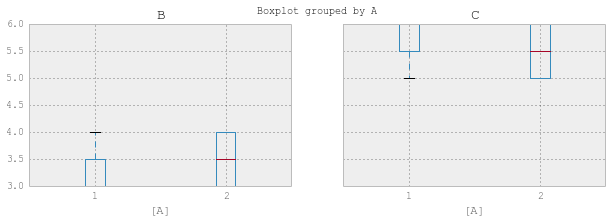

In [74]:
# графика
a.boxplot(by='A') # a.groupby('A').boxplot()

In [66]:
a

,A,B,C
0,1,3,5
1,2,4,5
2,2,3,5
3,1,4,6
4,1,3,6
5,2,3,6
6,2,4,6


In [50]:
# фильтрация
a.groupby('A').filter(lambda x: x['B'].sum()>10, dropna=False)

,A,B,C
0,NaN,NaN,NaN
1,2,4,5
2,2,3,5
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,2,3,6
6,2,4,6


In [74]:
# операции по группам (индуцируются разбиением по определённому признаку)
d = pd.DataFrame({'A': [1,2,2,1,1,2,2], 'B': [1,2,np.nan,5,3,1,10]})
d = d.sort('A')
print d
d['shift_B'] = d.groupby('A')['B'].shift(1) # сдвиг групп
d['counts'] = d.groupby(['A'])['B'].transform(len) # число элементов в группе
d

   A   B
0  1   1
3  1   5
4  1   3
1  2   2
2  2 NaN
5  2   1
6  2  10


,A,B,shift_B,counts
0,1,1,NaN,3
3,1,5,1,3
4,1,3,5,3
1,2,2,NaN,4
2,2,NaN,2,4
5,2,1,NaN,4
6,2,10,1,4


In [57]:
d = pd.DataFrame({'A': [1,2,2,1,1,2,2], 'B': [1,0,np.nan,1,0,1,0]})
d = d.sort('A')
print d

# длина и сколько 1 в каждой группе
d.groupby('A').agg({'A': len, 'B': lambda x: sum(x == 1)})

   A   B
0  1   1
3  1   1
4  1   0
1  2   0
2  2 NaN
5  2   1
6  2   0


,A,B
A,,
1,3,2
2,4,1


# Apply
функция по столбцам

In [72]:
a = pd.DataFrame({'A': [1,2,2,1,1,2,2], 'B': [3,4,3,4,3,3,4], 'C':[5,5,5,6,6,6,6]})
a

,A,B,C
0,1,3,5
1,2,4,5
2,2,3,5
3,1,4,6
4,1,3,6
5,2,3,6
6,2,4,6


In [73]:
def f(x):
    return pd.DataFrame({'x': x, 'x-mean': x - x.mean()})
a.groupby('A')['B'].apply(f)

,x,x-mean
0,3,-0.333333
1,4,0.500000
2,3,-0.500000
3,4,0.666667
4,3,-0.333333
5,3,-0.500000
6,4,0.500000


In [76]:
# пример нормировки 
print a.apply(lambda x: x/sum(x)) # по столбцам
a.apply(lambda x: x/sum(x), axis=1) # по строкам

          A         B         C
0  0.090909  0.125000  0.128205
1  0.181818  0.166667  0.128205
2  0.181818  0.125000  0.128205
3  0.090909  0.166667  0.153846
4  0.090909  0.125000  0.153846
5  0.181818  0.125000  0.153846
6  0.181818  0.166667  0.153846


,A,B,C
0,0.111111,0.333333,0.555556
1,0.181818,0.363636,0.454545
2,0.200000,0.300000,0.500000
3,0.090909,0.363636,0.545455
4,0.100000,0.300000,0.600000
5,0.181818,0.272727,0.545455
6,0.166667,0.333333,0.500000


In [300]:
# Более сложно...
# хотя тут проще с помощью векторизации

data = pd.DataFrame({'a': [1,2,3,4],
                     'b': [1,1,2,2]})

def f(x1, y1, x2, y2):
    return (np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2))

data['dist'] = data.apply(lambda row: f(row['a'], row['b'], 0.0, 0.0), axis=1)
data

,a,b,dist
0,1,1,1.414214
1,2,1,2.236068
2,3,2,3.605551
3,4,2,4.472136


In [33]:
# applymap - применение ко всем столбцам

a = pd.DataFrame({'A': [1,2,2], 'B': ['a','b','a']})

def some_fn(x):
    if type(x) is str:
        return 'applymap_' + x
    else:
        return (10*x)
    
a.applymap(some_fn)    

,A,B
0,10,applymap_a
1,20,applymap_b
2,20,applymap_a


# группировка серий

In [56]:
s = pd.Series(['a', 'aa', 'bA', 'BB', 'AB', 'AAB'])
s.groupby([1,2,1,2,1,1]).sum()

1    abAABAAB
2        aaBB
dtype: object

# Операции со строками

In [33]:
# Строковые операции
s = pd.Series(['AbA', 'Sasha', 'DataMining']) # ( [] )
s.str.lower()

0           aba
1         sasha
2    datamining
dtype: object

In [34]:
# работа со строками
df = pd.DataFrame({'name': [u'Маша', u'Саша', u'Рудольф'], 'mail':['1@mail.ru', 'Amail@vk.ru', '12_Wq@ru.ru']})
print df.mail.str.contains('mail')
pattern = '([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'
import re as re
df['mail'].str.match(pattern, flags=re.IGNORECASE)

0     True
1     True
2    False
Name: mail, dtype: bool


C:\Python27\lib\site-packages\pandas\core\strings.py:376: UserWarning: In future versions of pandas, match will change to always return a bool indexer.
  " always return a bool indexer.", UserWarning)


0      (1, mail, ru)
1    (Amail, vk, ru)
2    (12_Wq, ru, ru)
Name: mail, dtype: object

In [119]:
# Пример возможного извлечения признаков
lst = ['mark 10 12-10-2015', 'also 7 10-10-2014', 'take 2 01-05-2015']
df = pd.DataFrame({'x':lst})
df['num'] = df.x.str.extract('(\d+)')
df['date'] = df.x.str.extract('(..-..-....)')
df['word'] = df.x.str.extract('([a-z]\w{0,})')
df

,x,num,date,word
0,mark 10 12-10-2015,10,12-10-2015,mark
1,also 7 10-10-2014,7,10-10-2014,also
2,take 2 01-05-2015,2,01-05-2015,take


In [122]:
# забавная индексация
s = pd.Series(['one','two','three'])

s.str[1]

0    n
1    w
2    h
dtype: object

In [123]:
# экстракция
pd.Series(['a1', 'b2', 'c3']).str.extract('[ab](\d)')

0      1
1      2
2    NaN
dtype: object

# Иерархическая индексация

In [132]:
# иерархическая (многоуровневая) индексация
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
'foo', 'foo', 'qux', 'qux'],
 ['one', 'two', 'one', 'two',
'one', 'two', 'one', 'two']]))
print (tuples)

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (index)

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]
MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])


A         B
first second                    
bar   one    -1.482478 -0.689514
      two     0.699072  0.314689
baz   one     2.218556  0.536214
      two    -0.575797  0.376341
foo   one     0.781686  1.927202
      two     0.515154  0.571736
qux   one    -2.120607  0.020245
      two     0.990349 -0.678570

In [133]:
df.stack() # обратная операция unstack()

first  second   
bar    one     A   -1.482478
               B   -0.689514
       two     A    0.699072
               B    0.314689
baz    one     A    2.218556
               B    0.536214
       two     A   -0.575797
               B    0.376341
foo    one     A    0.781686
               B    1.927202
       two     A    0.515154
               B    0.571736
qux    one     A   -2.120607
               B    0.020245
       two     A    0.990349
               B   -0.678570
dtype: float64

In [137]:
df.index.levels[1] # уровень многоуровневой индексации

Index(['one', 'two'], dtype='object', name='second')

In [140]:
df.index.get_level_values(1) # как они идут...

Index(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'], dtype='object', name='second')

In [149]:
df.xs('bar') # ~ix доступ по многомерному индеесу
#, drop_level=False

,A,B
second,,
one,-1.482478,-0.689514
two,0.699072,0.314689


In [150]:
df.xs(['bar', 'one']) # ~ix доступ по многомерному индеесу


A   -1.482478
B   -0.689514
Name: (bar, one), dtype: float64

## Организация данных

и продолжение многомерных индексов

In [239]:
# pivot tables - сводные таблицы
df = pd.DataFrame({'ind1':[1,1,1,2,2,2,2], 'ind2':[1,1,2,2,3,3,2], 'x':[1,2,3,4,5,6,7], 'y':[1,1,1,1,1,1,2]})
print (df)
df.pivot(index='x', columns='ind2', values='y')
#print df.set_index(['ind1', 'ind2'], drop=False)

   ind1  ind2  x  y
0     1     1  1  1
1     1     1  2  1
2     1     2  3  1
3     2     2  4  1
4     2     3  5  1
5     2     3  6  1
6     2     2  7  2


ind2,1,2,3
x,,,
1,1.0,NaN,NaN
2,1.0,NaN,NaN
3,NaN,1.0,NaN
4,NaN,1.0,NaN
5,NaN,NaN,1.0
6,NaN,NaN,1.0
7,NaN,2.0,NaN


In [243]:
dfp = df.pivot_table(index=['ind1','ind2'], aggfunc='sum')
# отличается от df.set_index(['ind1', 'ind2'], drop=False)
dfp

x  y
ind1 ind2       
1    1      3  2
     2      3  1
2    2     11  3
     3     11  2

In [246]:
dfu = dfp.unstack() # перенос одного уровня индексов в столбцы
dfu

x                y          
ind2    1     2     3    1    2    3
ind1                                
1     3.0   3.0   NaN  2.0  1.0  NaN
2     NaN  11.0  11.0  NaN  3.0  2.0

In [248]:
dfu.stack(level=0) # перестыковка

ind2      1     2     3
ind1                   
1    x  3.0   3.0   NaN
     y  2.0   1.0   NaN
2    x  NaN  11.0  11.0
     y  NaN   3.0   2.0

In [241]:
print (dfp.sum(level='ind2'))

dfp.swaplevel('ind1','ind2')

       x  y
ind2       
1      3  2
2     14  4
3     11  2


x  y
ind2 ind1       
1    1      3  2
2    1      3  1
     2     11  3
3    2     11  2

In [249]:
cheese = pd.DataFrame({'first' : ['John', 'Mary'],
                       'last' : ['Doe', 'Bo'],
                       'height' : [5.5, 6.0],
                       'weight' : [130, 150]})
cheese

,first,height,last,weight
0,John,5.5,Doe,130
1,Mary,6.0,Bo,150


In [250]:
# операция, в некотором смысле обратная Pivot
pd.melt(cheese, id_vars=['first', 'last'])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [41]:
# панель (3D-дата-фрейм)
d = pd.DataFrame({'A': [1,2,2], 'B': [1,2,3]})
d2, d3 = d.copy(), d.copy()
p = pd.Panel({'df1':d, 'df2':d2, 'df3':d3})
p = p.transpose(2,0,1)
print p['A']
p

     0  1  2
df1  1  2  2
df2  1  2  2
df3  1  2  2


<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 3 (major_axis) x 3 (minor_axis)
Items axis: A to B
Major_axis axis: df1 to df3
Minor_axis axis: 0 to 2

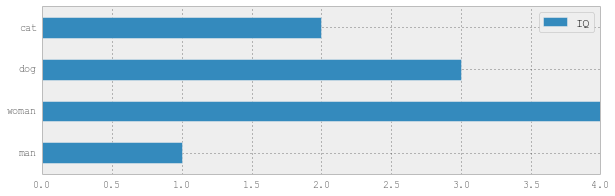

In [78]:
# графика
d = pd.DataFrame({"IQ": [1,4,3,2]})
d.index = ['man', 'woman', 'dog', 'cat']
d.plot(kind='barh')

,"(0.0349, 0.749]","(-0.679, 0.0349]","(-1.394, -0.679]","(0.749, 1.463]","(-2.108, -1.394]","(1.463, 2.178]","(-2.822, -2.108]","(2.178, 2.892]","(-3.543, -2.822]","(2.892, 3.606]"
0,2640,2570,1690,1569,627,585,155,110,28,26


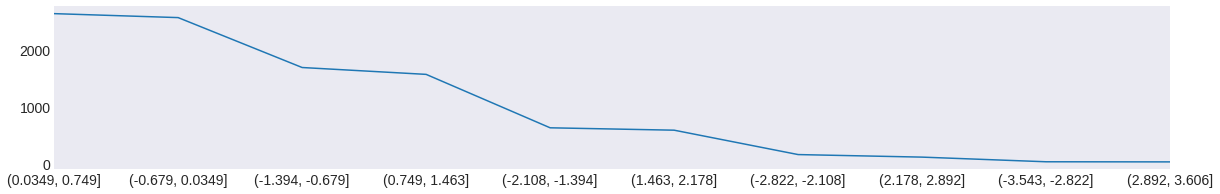

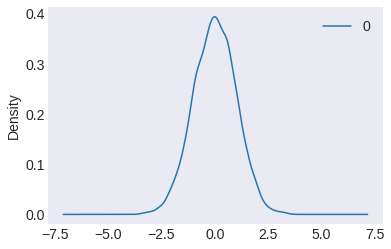

In [162]:
# создание категориального признака = интервалы попаданий
x = np.random.randn(10000)
y  = pd.cut(x,10)
z = pd.value_counts(y)
z.plot(figsize=(20,3))
pd.DataFrame(x).plot(kind='kde')
pd.DataFrame(z).T

## Категориальный тип

см. выше - cut

In [23]:
x = ['a', 'a', 'b', 'b', 'a', 'c']
xx = pd.Categorical(x)
xx

[a, a, b, b, a, c]
Categories (3, object): [a, b, c]

In [24]:
xx.categories

Index(['a', 'b', 'c'], dtype='object')

In [25]:
xx.get_values()

array(['a', 'a', 'b', 'b', 'a', 'c'], dtype=object)

In [26]:
xx.codes

array([0, 0, 1, 1, 0, 2], dtype=int8)

In [27]:
# переименование
xx.categories = ['X1', 'X2', 'X3']
xx

[X1, X1, X2, X2, X1, X3]
Categories (3, object): [X1, X2, X3]

In [28]:
# переименование "на месте"
xx.rename_categories(['a', 'b', 'c'])

[a, a, b, b, a, c]
Categories (3, object): [a, b, c]

In [159]:
# приведение к категориальному типу
pd.Series([1, 2, 1, 5, 5]).astype('category')

0    1
1    2
2    1
3    5
4    5
dtype: category
Categories (3, int64): [1, 2, 5]

In [161]:
tmp = dict([('A',[1, 1, 2, 2]), ('B',[1., 2., 1., 2.])]) # ещё один способ
df = pd.DataFrame(tmp)
df['A'] = df['A'].astype('category') # преобразование в категорный тип
print (df['A'].cat.categories)
df

Int64Index([1, 2], dtype='int64')


,A,B
0,1,1.0
1,1,2.0
2,2,1.0
3,2,2.0


In [170]:
# упорядоченные категории
x = pd.Categorical(['a', 'b', 'a', 'c', 'c'],
               categories=['a', 'b', 'c'],
               ordered=True)
x

[a, b, a, c, c]
Categories (3, object): [a < b < c]

In [165]:
# сравнение категорий
x < 'b'

array([ True, False,  True, False, False], dtype=bool)

In [166]:
# переименование категорий
x.rename_categories(['x', 'y', 'z'])

[x, y, x, z, z]
Categories (3, object): [x < y < z]

In [171]:
x = x.add_categories(['d'])
x = x.remove_categories(['b'])
x

[a, NaN, a, c, c]
Categories (3, object): [a < c < d]

In [173]:
x.value_counts()

a    2
c    2
d    0
dtype: int64

In [174]:
x.describe()

,counts,freqs
categories,,
a,2,0.4
c,2,0.4
d,0,0.0
NaN,1,0.2


# Задача с усреднением
Считаем среднее для каждой группы (магазин, день) на обучении и выдаём это для теста

In [8]:
# датасеты продаж в магазинах
train = pd.DataFrame({'day': [1,2,1,2,1,2,1,2,1,2], 'store':[3,3,3,3,3,4,4,4,4,4], 'sales':[5,5,6,6,7,7,5,5,1,2]})
test = pd.DataFrame({'day': [1,2,1,2,1,2,1,2], 'store':[3,3,4,4,4,4,4,4], 'sales':[6,6,7,7,5,5,1,2]})
# среднее в каждый день в каждом магазине
st = train.groupby(['day', 'store'])['sales'].mean()
st

day  store
1    3        6.000000
     4        3.000000
2    3        5.500000
     4        4.666667
Name: sales, dtype: float64

In [9]:
# вектор ответов (на тесте)
a = test[['day', 'store']].apply(lambda x: st[x[0], x[1]], axis=1).values
a

array([ 6.        ,  5.5       ,  3.        ,  4.66666667,  3.        ,
        4.66666667,  3.        ,  4.66666667])

In [10]:
# вывод в таблице день-магазин
tmp = pd.DataFrame(st)
tmp.T.stack(0)

store        3         4
      day               
sales 1    6.0  3.000000
      2    5.5  4.666667

In [13]:
# другой способ вывода для теста...

In [14]:
st=st.reset_index()
st

,day,store,sales
0,1,3,6.000000
1,1,4,3.000000
2,2,3,5.500000
3,2,4,4.666667


In [28]:
a = pd.merge( test, st, on = ['day', 'store'], how = 'left')
a

,day,sales_x,store,sales_y
0,1,6,3,6.000000
1,2,6,3,5.500000
2,1,7,4,3.000000
3,1,5,4,3.000000
4,1,1,4,3.000000
5,2,7,4,4.666667
6,2,5,4,4.666667
7,2,2,4,4.666667


# Несколько колонок как функция одной

In [27]:
a = pd.DataFrame({'a': [1,2,1,2], 'b':[3,3,3,4]})

def two_three_strings(x):
    return x*2, x*3

a['twice'], a['thrice'] = zip(*a['a'].map(two_three_strings))
a

,a,b,twice,thrice
0,1,3,2,3
1,2,3,4,6
2,1,3,2,3
3,2,4,4,6


In [45]:
# поскольку...
a['a'].map(two_three_strings)

0    (2, 3)
1    (4, 6)
2    (2, 3)
3    (4, 6)
Name: a, dtype: object

# Одна колонка как функция нескольких

In [47]:
df = pd.DataFrame({'name': [u'Маша', u'Саша', u'Рудольф'], 'surname':[u'Петрова', u'Сидоров', u'Кац']})
print df.name
print df.surname

lst = []
for n, s in zip(df.name,  df.surname):
    lst.append(n + ' ' + s)
df['fullname'] = lst

df['fullname2'] = df[['name', 'surname']].apply(lambda x: x[0] + ' ' + x[1], axis=1)

df['fullname3'] = df['name'] + ' ' + df['surname']
df

0       Маша
1       Саша
2    Рудольф
Name: name, dtype: object
0    Петрова
1    Сидоров
2        Кац
Name: surname, dtype: object


,name,surname,fullname,fullname2,fullname3
0,Маша,Петрова,Маша Петрова,Маша Петрова,Маша Петрова
1,Саша,Сидоров,Саша Сидоров,Саша Сидоров,Саша Сидоров
2,Рудольф,Кац,Рудольф Кац,Рудольф Кац,Рудольф Кац


# Временные ряды

In [273]:
import datetime
from datetime import datetime, date

datetime(2017, 1, 3)

datetime.datetime(2017, 1, 3, 0, 0)

In [274]:
datetime.now()

datetime.datetime(2018, 1, 15, 22, 4, 53, 206652)

In [275]:
datetime.date(datetime.now())

datetime.date(2018, 1, 15)

In [276]:
pd.Timestamp('2017-01-03')

Timestamp('2017-01-03 00:00:00')

In [277]:
pd.Timestamp('now')

Timestamp('2018-01-15 22:07:10.830018')

In [278]:
pd.Timestamp('now') - pd.Timedelta(days=1)

Timestamp('2018-01-14 22:08:00.278987')

In [279]:
datetime(2017, 10, 2) - datetime(2017, 9, 2)

datetime.timedelta(30)

In [281]:
i = pd.to_datetime(['2012-01-01', '2012-01-03', '2012-01-06'])
i

DatetimeIndex(['2012-01-01', '2012-01-03', '2012-01-06'], dtype='datetime64[ns]', freq=None)

In [282]:
pd.Series([1,3,2], index=i)

2012-01-01    1
2012-01-03    3
2012-01-06    2
dtype: int64

In [283]:
pd.date_range('3/4/2014', periods=7)

DatetimeIndex(['2014-03-04', '2014-03-05', '2014-03-06', '2014-03-07',
               '2014-03-08', '2014-03-09', '2014-03-10'],
              dtype='datetime64[ns]', freq='D')

In [285]:
# все среды в указанном промежутке
pd.date_range('2014-06-01', '2014-07-31', freq="W-WED")

DatetimeIndex(['2014-06-04', '2014-06-11', '2014-06-18', '2014-06-25',
               '2014-07-02', '2014-07-09', '2014-07-16', '2014-07-23',
               '2014-07-30'],
              dtype='datetime64[ns]', freq='W-WED')

In [287]:
# специальный тип для периодов времени
pd.period_range('1/1/2013', '12/31/2013', freq='M')

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='period[M]', freq='M')

In [288]:
i = pd.to_datetime(['2012-01-01', '2012-01-03', '2012-01-06'])
s = pd.Series([1,3,2], index=i)
s.shift(1)

2012-01-01    NaN
2012-01-03    1.0
2012-01-06    3.0
dtype: float64

In [291]:
s.shift(1, pd.DateOffset(minutes=0.5))

2012-01-01 00:00:30    1
2012-01-03 00:00:30    3
2012-01-06 00:00:30    2
dtype: int64

In [297]:
# Фиксированная частота
s2 = s.asfreq('D', method='bfill')
s2

2012-01-01    1
2012-01-02    3
2012-01-03    3
2012-01-04    2
2012-01-05    2
2012-01-06    2
Freq: D, dtype: int64

In [298]:
# изменение частоты с пересчётом значений
s2.resample('W').mean()

2012-01-01    1.0
2012-01-08    2.4
Freq: W-SUN, dtype: float64

In [29]:
#временные ряды

data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994', '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592', '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109', '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877'],
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41]}
df = pd.DataFrame(data)
df.index = pd.to_datetime(df['date'])
del df['date']
df['05-2014']

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


                            battle_deaths
date                                     
2014-05-01 18:47:05.069722             34
2014-05-01 18:47:05.119994             25
                            battle_deaths
date                                     
2014-05-03 18:47:05.332662             26
2014-05-03 18:47:05.385109             25
2014-05-04 18:47:05.436523             62
2014-05-04 18:47:05.486877             41
Axes(0.125,0.125;0.775x0.775)


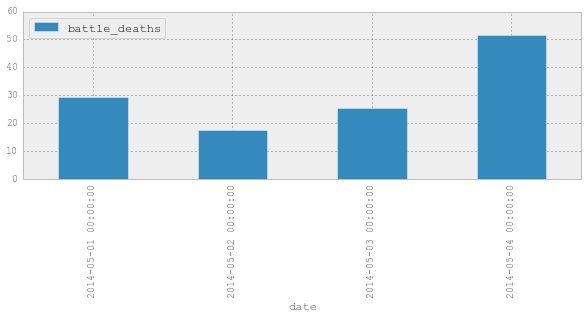

In [30]:
# индексация
print df['5/1/2014']  # df['2014-05-01'] 
print df['2014-05-03':'2014-05-04']
# переход к дням и визуализация
print df.resample('D', how='mean').plot(kind='bar')

In [31]:
# пересортировка df
df.sort_index(by = 'battle_deaths', inplace=True)
df

,battle_deaths
date,
2014-05-02 18:47:05.280592,14
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-01 18:47:05.119994,25
2014-05-03 18:47:05.385109,25
2014-05-02 18:47:05.178768,26
2014-05-03 18:47:05.332662,26
2014-05-01 18:47:05.069722,34
2014-05-04 18:47:05.486877,41


# Время

In [3]:
import pandas as pd
pd.date_range('2015-01-01', freq='SM', periods=4)

DatetimeIndex(['2015-01-15', '2015-01-31', '2015-02-15', '2015-02-28'], dtype='datetime64[ns]', freq='SM-15')

In [4]:
from pandas.tseries.offsets import SemiMonthEnd, SemiMonthBegin
pd.Timestamp('2016-01-01') + SemiMonthBegin()

Timestamp('2016-01-15 00:00:00')

# Другие возможности

In [204]:
# скользящее среднее
a = pd.DataFrame({'x':[1,2,3,1,2,3,1,2,3], 'y':[2,2,10,2,2,2,2,2,2]})
pd.rolling_mean(a, 2) # можно сумму, медиану и т.п.

,x,y
0,NaN,NaN
1,1.5,2.0
2,2.5,6.0
3,2.0,6.0
4,1.5,2.0
5,2.5,2.0
6,2.0,2.0
7,1.5,2.0
8,2.5,2.0


In [49]:
# удаление дубликатов

df = pd.DataFrame({'name': ['Al', 'Max',  'Al'], 'surname':[u'Run', u'Crone', u'Run']})
print df.duplicated()
df.drop_duplicates(['name'], take_last=True) # df.drop_duplicates()

0    False
1    False
2     True
dtype: bool


,name,surname
1,Max,Crone
2,Al,Run


In [134]:
df = pd.DataFrame({'x':[12, 10, 54, 10], 'y':[2, 4, 1, 4]})
print df.rank(method='average') # номера по возрастанию
print df.idxmax() # индексы максимальных элементов

     x    y
0  3.0  2.0
1  1.5  3.5
2  4.0  1.0
3  1.5  3.5
x    2
y    1
dtype: int64


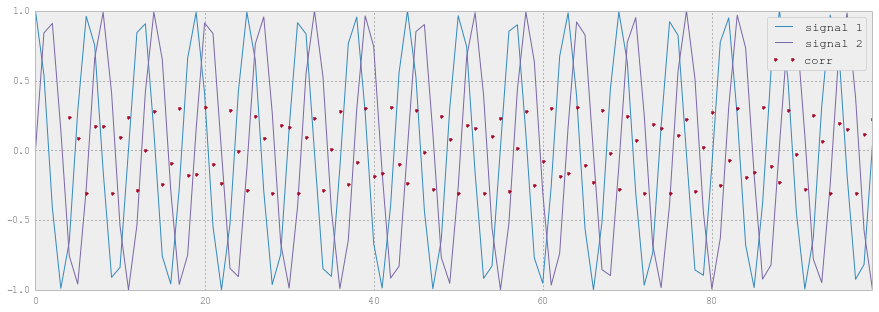

In [148]:
# корреляция
figsize(15,5)
s1 = pd.Series(np.cos(np.arange(100)))
s2 = pd.Series(np.sin(np.arange(100)))
f = pd.DataFrame({'s1':s1, 's2':s2}).plot()
pd.rolling_corr(s1, s2, window=5).plot(style='.')
f.legend(['signal 1', 'signal 2', 'corr'])

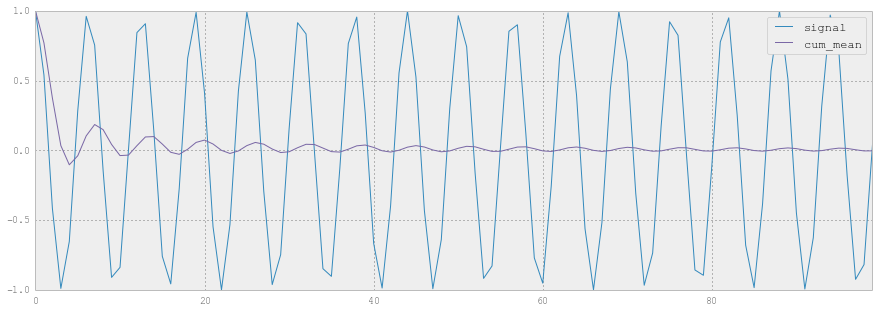

In [150]:
# кумулятивное усреднение
s1 = pd.Series(np.cos(np.arange(100)))
s2 = pd.expanding_mean(s1)
f = pd.DataFrame({'s1':s1, 's2':s2}).plot()
f.legend(['signal', 'cum_mean'])

In [59]:
# сколько каждого значения
print pd.value_counts([3,2,2,2,5,3], sort=False)
# мода
print pd.DataFrame({'x': [3,2,2,2,5,3,3]}).mode()

2    3
3    2
5    1
dtype: int64
   x
0  2
1  3


In [124]:
# dummy-кодирование для категориальных признаков
pd.get_dummies([1,2,1,2,3])

,1,2,3
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,0,1


In [8]:
# ещё dummy-кодирование
pd.Series(['one,two', 'two,three', 'one!']).str.get_dummies(sep=',')

,one,one!,three,two
0,1,0,0,1
1,0,0,1,1
2,0,1,0,0


In [10]:
# нумерация факторов
pd.factorize([20,10,np.nan,10,np.nan,30,20])

(array([ 0,  1, -1,  1, -1,  2,  0]), array([ 20.,  10.,  30.]))

In [106]:
# время
# НОВАЯ PANDAS
# s = pd.Series(pd.period_range('20130101', periods=4, freq='D'))
# print s
# print s.dt.day

In [127]:
# n наименьших
s = pd.Series([3,2,6,5,1,4])
s.nsmallest(3)

4    1
1    2
0    3
dtype: int64

In [7]:
# НОВАЯ PANDAS
# print pd.Series([3,2,2,2,5,3,3]).sample(3)

In [39]:
df = pd.DataFrame(np.random.rand(5, 5),
                  columns=['x1', 'x2', 'x3', 'x4', 'x5'])
df.cov()

,x1,x2,x3,x4,x5
x1,0.076991,0.029421,0.003822,-0.011480,0.045734
x2,0.029421,0.114477,-0.013508,-0.030640,0.017734
x3,0.003822,-0.013508,0.121479,-0.001452,0.026303
x4,-0.011480,-0.030640,-0.001452,0.080235,0.000994
x5,0.045734,0.017734,0.026303,0.000994,0.033119


In [40]:
df.cov()

,x1,x2,x3,x4,x5
x1,0.076991,0.029421,0.003822,-0.011480,0.045734
x2,0.029421,0.114477,-0.013508,-0.030640,0.017734
x3,0.003822,-0.013508,0.121479,-0.001452,0.026303
x4,-0.011480,-0.030640,-0.001452,0.080235,0.000994
x5,0.045734,0.017734,0.026303,0.000994,0.033119


In [41]:
bins = pd.cut(df['x1'], 3)

In [49]:
np.random.seed(10)
ages = np.random.randint(6, 45, 70)

points = [0, 12, 18, 25, 50, 100]
labels = ['ребёнок', 'юноша', 'молодой человек', 'мужчина', 'пожилой']
factors = pd.cut(ages, points, labels=labels)
factors.describe()

,counts,freqs
categories,,
ребёнок,6,0.085714
юноша,14,0.200000
молодой человек,15,0.214286
мужчина,35,0.500000
пожилой,0,0.000000


In [53]:
factors = pd.qcut(ages, 4)
factors.describe()

,counts,freqs
categories,,
"(5.999, 17.0]",19,0.271429
"(17.0, 25.0]",16,0.228571
"(25.0, 34.0]",19,0.271429
"(34.0, 42.0]",16,0.228571


In [54]:
factors = pd.cut(ages, 4)
factors.describe()

,counts,freqs
categories,,
"(5.964, 15.0]",14,0.200000
"(15.0, 24.0]",21,0.300000
"(24.0, 33.0]",15,0.214286
"(33.0, 42.0]",20,0.285714


In [56]:
df['x1'].rank()

0    2.0
1    5.0
2    3.0
3    4.0
4    1.0
Name: x1, dtype: float64

In [58]:
ages

array([15, 42, 21,  6, 34, 31, 35, 35, 14, 15,  6, 42, 22, 42, 17, 30, 39,
       14, 42, 20, 19, 11, 19, 31, 19, 34, 28, 36, 36, 31, 18,  7, 37, 42,
       33, 24, 35, 19, 28, 29, 36, 17, 34, 16, 30, 15, 21, 24, 22, 13, 30,
       17, 23, 13, 17, 34, 39, 26, 38, 30, 11, 10, 13, 30, 30, 40, 21, 19,
       30, 21])